In [80]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

csv_folder = 'csv_files'

## 출원인 1인당 평균 출원건수

* 국내개인 출원인의 1인당 평균 출원건수 / 년도별 
* 국내법인 출원인의 1인당 평균 출원건수 / 년도별

In [3]:
df = pd.read_csv(f'{csv_folder}/APPLICANT_16_to_19.csv')

# 출원인코드 앞자리 1또는 4  (국내개인, 국내법인)
df = df[(df['시도국적코드명'] == '대한민국') 
        & ((df['출원인코드'] // 100000000000 == 1)
            | (df['출원인코드'] // 100000000000 == 4))]

In [4]:
# 그 해의 년도 column 추가
df['출원년도'] = df['출원번호'] // 10000000 - 400000

# 출원유형 column 추가
df['출원유형'] =  ['국내개인' if s // 100000000000 == 1 else '국내법인' for s in df['출원인코드']]

In [7]:
group = df.groupby(['출원년도', '출원유형', '출원인코드'])

In [8]:
gc = group['출원인코드'].agg(['count'])
gc.head()

count
출원년도 출원유형 출원인코드              
2016 국내개인 119950098299      6
          119980002501      8
          119980010211      1
          119980015550     11
          119980016467      3

In [64]:
average_by_year = gc.groupby(['출원유형', '출원년도']).mean()
average_by_year = average_by_year.values

individual = []
corporation = []
years = list(set(df['출원년도'].astype('int')))

# print(average_by_year[1])
for i in range(len(years)):
    individual.append(round(average_by_year[2*i][0], 2))
    corporation.append(round(average_by_year[2*i + 1][0]))

individual = np.array(individual)
corporation = np.array(corporation)
print(individual, corporation)

[5.95 4.01 1.63 1.95] [5. 2. 2. 2.]


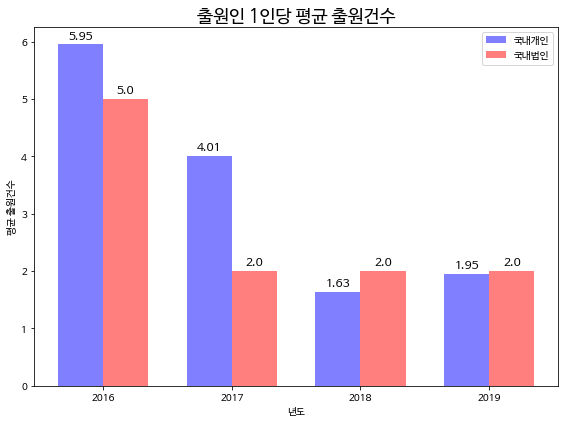

In [86]:
# function to add value labels
def add_labels(ax, x, y):
    for i in range(len(x)):
        ax.text(x[i], y[i] + 0.1, y[i], ha = 'center', fontsize=12)

x = np.array(years)
labels = [2016, 2017, 2018, 2019]
width = 0.35
alpha = 0.5

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, individual, 
             width, 
             color='b', 
             alpha=alpha,
             label='국내개인')

rects2 = ax.bar(x + width/2, corporation, 
             width,
             color='r', 
             alpha=alpha,
             label='국내법인')

ax.set_title('출원인 1인당 평균 출원건수', fontsize=18)
ax.set_xlabel('년도')
ax.set_ylabel('평균 출원건수')

ax.set_xticks(x)
ax.set_xticklabels(labels)
add_labels(ax, x - width/2, individual)
add_labels(ax, x + width/2, corporation)
ax.legend()

fig.tight_layout()
plt.show()